# The Commons XR Take Home Assignment   

### *Objective*:
#### The purpose of this assessment is to demonstrate proficiency in Python programming, exploratory data analysis, feature engineering, and modeling. The assessment will include analyzing a provided dataset, exploring its charactersistics, abstracting meaningful features, and building a predictive model to address a specific problem or question, which is to be determined by the programmer. Lastly, a model will be utilized to make predictions for the problem/question. Make sure to provide enough rationale to the code and process. Also, add as many code cells needed. 

### This take-home assignment is a chance to really showcase your coding skills and articulate your approach. It is encouraged to write your best, clean, and organized code while applying effective programming principles and strategies.

## ANALYSIS - Cheril Yogi
I have chosen to build a predictive model to analyze traffic accident data and predict the number of injuries in a crash, based on a variety of features, including:

Borough where the crash occurred.
Vehicle types involved in the crash.
Contributing factors (e.g., "Driver Inattention" or "Alcohol Involvement").
Time of the accident (e.g., hour of the day, rush hours).
Additionally, by using NLP techniques (such as TF-IDF) on textual contributing factors, I would be aiming to uncover the major contributing factors to accidents across different boroughs of New York City and relate them to crash severity.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### A requirment is to to use scikit-learn and/or PyTorch

In [24]:
# Import File

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv ("/Users/cherilyogi/Desktop/XR/Motor_Vehicle_Collisions_-_Crashes.csv")
df.head()

<ipython-input-2-c99b7ae8b760>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv ("/Users/cherilyogi/Desktop/XR/Motor_Vehicle_Collisions_-_Crashes.csv")


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing 

In [3]:
# Inspecting the data (number of rows, columns, data types)
print("Shape of the data (rows, columns):", df.shape)
print("\nData Types and Column Names:\n", df.dtypes)


Shape of the data (rows, columns): (2109802, 29)

Data Types and Column Names:
 CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTO

In [4]:
# unique values and counts for each column in the dataframe
def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column: {column}")
        print(f"Number of unique values: {len(unique_values)}")
        print("-" * 50)

print_unique_values(df)


Column: CRASH DATE
Number of unique values: 4420
--------------------------------------------------
Column: CRASH TIME
Number of unique values: 1440
--------------------------------------------------
Column: BOROUGH
Number of unique values: 6
--------------------------------------------------
Column: ZIP CODE
Number of unique values: 427
--------------------------------------------------
Column: LATITUDE
Number of unique values: 127007
--------------------------------------------------
Column: LONGITUDE
Number of unique values: 98616
--------------------------------------------------
Column: LOCATION
Number of unique values: 287866
--------------------------------------------------
Column: ON STREET NAME
Number of unique values: 18578
--------------------------------------------------
Column: CROSS STREET NAME
Number of unique values: 20307
--------------------------------------------------
Column: OFF STREET NAME
Number of unique values: 232141
----------------------------------------

In [5]:
# missing values (NaNs) in each column
print("\nNumber of Missing Values in Each Column:\n", df.isnull().sum())


Number of Missing Values in Each Column:
 CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           656286
ZIP CODE                          656545
LATITUDE                          238615
LONGITUDE                         238615
LOCATION                          238615
ON STREET NAME                    450495
CROSS STREET NAME                 802017
OFF STREET NAME                  1751680
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       7020
CONTRIBUTING FACTOR VEHICLE 2     329427
CONTRIBUTING FACTOR VEHICLE 3    1958388
CONTRIBUTING FACTOR VEHICLE 4    2075501
CONTRIBUTING FACTOR VEHICLE 5    2100491
COLLISION_ID  

In [6]:
# Basic statistics of the dataset (numerical data)
print("\nBasic Statistical Description:\n", df.describe(include='all'))


Basic Statistical Description:
         CRASH DATE CRASH TIME   BOROUGH   ZIP CODE      LATITUDE  \
count      2109802    2109802   1453516  1453257.0  1.871187e+06   
unique        4420       1440         5      426.0           NaN   
top     01/21/2014      16:00  BROOKLYN    11207.0           NaN   
freq          1161      28742    463075    21342.0           NaN   
mean           NaN        NaN       NaN        NaN  4.062307e+01   
std            NaN        NaN       NaN        NaN  2.026969e+00   
min            NaN        NaN       NaN        NaN  0.000000e+00   
25%            NaN        NaN       NaN        NaN  4.066768e+01   
50%            NaN        NaN       NaN        NaN  4.072065e+01   
75%            NaN        NaN       NaN        NaN  4.076963e+01   
max            NaN        NaN       NaN        NaN  4.334444e+01   

           LONGITUDE    LOCATION                    ON STREET NAME  \
count   1.871187e+06     1871187                           1659307   
unique    

In [7]:
#  duplicates in each column
def check_duplicates(df):
    duplicates = {}
    for col in df.columns:
        duplicates[col] = df[col].duplicated().sum() 
    return duplicates


duplicate_values = check_duplicates(df)

for column, count in duplicate_values.items():
    print(f"{column}: {count} duplicate values")


CRASH DATE: 2105382 duplicate values
CRASH TIME: 2108362 duplicate values
BOROUGH: 2109796 duplicate values
ZIP CODE: 2109375 duplicate values
LATITUDE: 1982795 duplicate values
LONGITUDE: 2011186 duplicate values
LOCATION: 1821936 duplicate values
ON STREET NAME: 2091224 duplicate values
CROSS STREET NAME: 2089495 duplicate values
OFF STREET NAME: 1877661 duplicate values
NUMBER OF PERSONS INJURED: 2109769 duplicate values
NUMBER OF PERSONS KILLED: 2109794 duplicate values
NUMBER OF PEDESTRIANS INJURED: 2109788 duplicate values
NUMBER OF PEDESTRIANS KILLED: 2109797 duplicate values
NUMBER OF CYCLIST INJURED: 2109797 duplicate values
NUMBER OF CYCLIST KILLED: 2109799 duplicate values
NUMBER OF MOTORIST INJURED: 2109771 duplicate values
NUMBER OF MOTORIST KILLED: 2109796 duplicate values
CONTRIBUTING FACTOR VEHICLE 1: 2109740 duplicate values
CONTRIBUTING FACTOR VEHICLE 2: 2109740 duplicate values
CONTRIBUTING FACTOR VEHICLE 3: 2109750 duplicate values
CONTRIBUTING FACTOR VEHICLE 4: 210

Before moving any further and making changes in the dataframe , let's first save a copy of the original data

In [9]:

df_copy = df.copy()
df_copy.to_csv('/Users/cherilyogi/Desktop/XR/df_copy_backup.csv', index=False)
print("The df_copy has been saved as 'df_copy_backup.csv'.")


Since there are various Vehicle types with alot of typos, and repetition for exanple Taxi is represented as TAXI and taxi , we will be figuring out the unique value and group them. Iam  also checking the frequecy of vehicles to get any idea as to what type of vehcile is most associated with accidents. 

In [ ]:

vehicle_types = df['VEHICLE TYPE CODE 1'].unique()
print(f"Unique vehicle types (VEHICLE TYPE CODE 1):\n{vehicle_types}")
print(f"\nTotal number of unique vehicle types: {len(vehicle_types)}")

# Optionally, show the frequency of each vehicle type
vehicle_type_counts = df['VEHICLE TYPE CODE 1'].value_counts()
print("\nVehicle type frequency counts:\n", vehicle_type_counts.head(10))  # Printing top 10 most frequent vehicle types


In [ ]:
# mapping to group similar vehicle types and placing uncommon types in 'Other'
vehicle_type_mapping = {
    'Sedan': 'Sedan',
    '4 dr sedan': 'Sedan',
    'PASSENGER VEHICLE': 'Passenger Vehicle',
    'Station Wagon/Sport Utility Vehicle': 'SUV/Station Wagon',
    'SPORT UTILITY / STATION WAGON': 'SUV/Station Wagon',
    'Pick-up Truck': 'Truck',
    'Box Truck': 'Truck',
    'Taxi': 'Taxi',
    'TAXI': 'Taxi',
    'Van': 'Van',
    'VAN': 'Van',
    'Dump': 'Other',  # Example of handling uncommon vehicle types
    'Sprinter': 'Other',
    'Usaa': 'Other',
    'cp': 'Other',
    'Unknown': 'Unknown'  
}

df['CLEANED_VEHICLE_TYPE'] = df['VEHICLE TYPE CODE 1'].map(vehicle_type_mapping).fillna('Other')

cleaned_vehicle_type_counts = df['CLEANED_VEHICLE_TYPE'].value_counts()
print("\nCleaned Vehicle Type Frequency Counts:\n", cleaned_vehicle_type_counts.head(10))

threshold = 5000 
df['CLEANED_VEHICLE_TYPE'] = df['CLEANED_VEHICLE_TYPE'].apply(lambda x: 'Other' if cleaned_vehicle_type_counts[x] < threshold else x)

final_vehicle_type_counts = df['CLEANED_VEHICLE_TYPE'].value_counts()
print("\nFinal Cleaned Vehicle Type Frequency Counts:\n", final_vehicle_type_counts)


Now the focus will be on the Longitude and Latitude column, and to find a way to impute the missing values. The reason why this is of much importance is because further down I will be using *Clustering* to impute the Borough column. Waht I mean by that I will be making clusters of Longitude and latitude based on the data that is provided and then impute the missing Boruogh value based on latitude and longitude clustering. 


For imputation of Latitiude and Longitude I will be using simple Mean Value Imputation. 

In [10]:
#  mean imputation for LATITUDE and LONGITUDE columns
latitude_mean = df['LATITUDE'].mean()
longitude_mean = df['LONGITUDE'].mean()

In [11]:
df['LATITUDE'].fillna(latitude_mean, inplace=True)
df['LONGITUDE'].fillna(longitude_mean, inplace=True)

In [12]:
# number of missing values after imputation
print(f"Number of missing values in LATITUDE after imputation: {df['LATITUDE'].isna().sum()}")
print(f"Number of missing values in LONGITUDE after imputation: {df['LONGITUDE'].isna().sum()}")

# Optional: mean values used for imputation
print(f"Mean value used for LATITUDE imputation: {latitude_mean}")
print(f"Mean value used for LONGITUDE imputation: {longitude_mean}")

Number of missing values in LATITUDE after imputation: 0
Number of missing values in LONGITUDE after imputation: 0
Mean value used for LATITUDE imputation: 40.62307231597661
Mean value used for LONGITUDE imputation: -73.7437093564847


##### Imputing "Borough" column using clustering. 

In [14]:
# Step 1: Filter rows where borough is missing but latitude and longitude are present
missing_borough = df[df['BOROUGH'].isna()]
known_borough = df[df['BOROUGH'].notna()]

print(f"Number of records with missing BOROUGH: {len(missing_borough)}")
print(f"Number of records with known BOROUGH: {len(known_borough)}")

Number of records with missing BOROUGH: 656286
Number of records with known BOROUGH: 1453516


In [15]:
# Step 2: Apply KMeans clustering to known borough data based on latitude and longitude
# I am choosing 5 clusters for the 5 boroughs
kmeans = KMeans(n_clusters=5, random_state=42)
known_borough['cluster'] = kmeans.fit_predict(known_borough[['LATITUDE', 'LONGITUDE']])

<ipython-input-15-825ce231a270>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_borough['cluster'] = kmeans.fit_predict(known_borough[['LATITUDE', 'LONGITUDE']])


In [16]:
# Step 3: mapping from clusters to boroughs (using the most frequent borough in each cluster)
cluster_to_borough = known_borough.groupby('cluster')['BOROUGH'].agg(lambda x: x.value_counts().index[0])

print("Cluster to Borough mapping:")
print(cluster_to_borough)

Cluster to Borough mapping:
cluster
0            BRONX
1         BROOKLYN
2         BROOKLYN
3           QUEENS
4    STATEN ISLAND
Name: BOROUGH, dtype: object


## Potential Error

It's interesting that Brooklyn appears twice in the cluster mapping, and Manhattan is missing. I feel that this likely happened because two clusters were assigned to the geographical area that overlaps with Brooklyn, while no cluster was assigned to Manhattan.

Possible Reasons can also be:
1. Geographical Overlap
2. Imbalanced Data


To address this issue I am prposing two solutions Steps:
1. Increase the Number of Clusters: Use 6 clusters instead of 5 to separate Brooklyn into its own cluster and allow Manhattan to be identified. This might help to give Manhattan its own cluster if it was getting grouped with Brooklyn.
2. Constrain Cluster Sizes: Use DBSCAN or a clustering algorithm that better handles density differences across boroughs, though this would require some tuning.


Option 1: Increase the Number of Clusters to 6

In [17]:
# Increasing clusters to 6 to separate Manhattan and Brooklyn
kmeans = KMeans(n_clusters=6, random_state=42)
known_borough['cluster'] = kmeans.fit_predict(known_borough[['LATITUDE', 'LONGITUDE']])

cluster_to_borough = known_borough.groupby('cluster')['BOROUGH'].agg(lambda x: x.value_counts().index[0])

print("Cluster to Borough mapping:")
print(cluster_to_borough)


Cluster to Borough mapping:
cluster
0            BRONX
1         BROOKLYN
2         BROOKLYN
3           QUEENS
4    STATEN ISLAND
5        MANHATTAN
Name: BOROUGH, dtype: object


<ipython-input-17-be1e5dd1e1ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_borough['cluster'] = kmeans.fit_predict(known_borough[['LATITUDE', 'LONGITUDE']])


##### Alternative Method 

There was one more method where we can manually adjust the value , but since the data is too much it wont be feasible. I still endned up doing that just to cross-verify the result I got above and ther were the same. 

In [22]:
# # Manhattan Latitude/Longitude ranges 
# manhattan_lat_range = (40.70, 40.82)
# manhattan_lon_range = (-74.02, -73.93)

# manhattan_cluster = known_borough[
#     (known_borough['LATITUDE'].between(manhattan_lat_range[0], manhattan_lat_range[1])) &
#     (known_borough['LONGITUDE'].between(manhattan_lon_range[0], manhattan_lon_range[1]))
# ]['cluster'].mode()[0]  # Select the most common cluster in Manhattan's lat/lon range

# cluster_to_borough[manhattan_cluster] = 'MANHATTAN'

# print("Adjusted Cluster to Borough mapping:")
# print(cluster_to_borough)


In [18]:
# Step 4: Using KMeans to predict cluster labels for the missing borough data
missing_borough['cluster'] = kmeans.predict(missing_borough[['LATITUDE', 'LONGITUDE']])

<ipython-input-18-df9da2c70a72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_borough['cluster'] = kmeans.predict(missing_borough[['LATITUDE', 'LONGITUDE']])


In [19]:
# Step 5: Imputing missing boroughs based on their cluster
missing_borough['BOROUGH'] = missing_borough['cluster'].map(cluster_to_borough)

<ipython-input-19-297a97488610>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_borough['BOROUGH'] = missing_borough['cluster'].map(cluster_to_borough)


In [20]:
# Step 6: Updating the original dataframe with the imputed boroughs
df.update(missing_borough[['BOROUGH']])

# Final step: Checking if missing borough values were filled
missing_count = df['BOROUGH'].isna().sum()
print(f"Number of missing BOROUGH values after imputation: {missing_count}")

Number of missing BOROUGH values after imputation: 0


##### Visual represenation of the clusters, with known boroughs and unknowns too 

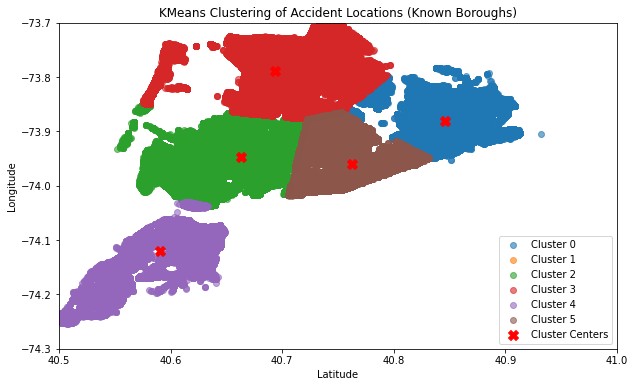

In [21]:
# Step 1: Plotting the known boroughs and their clusters
plt.figure(figsize=(10, 6))

for cluster in np.unique(known_borough['cluster']):
    cluster_data = known_borough[known_borough['cluster'] == cluster]
    plt.scatter(cluster_data['LATITUDE'], cluster_data['LONGITUDE'], label=f'Cluster {cluster}', alpha=0.6)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=100, label='Cluster Centers')

plt.title('KMeans Clustering of Accident Locations (Known Boroughs)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()

plt.xlim(40.5, 41.0)  # Latitude range for NYC
plt.ylim(-74.3, -73.7)  # Longitude range for NYC

plt.show()

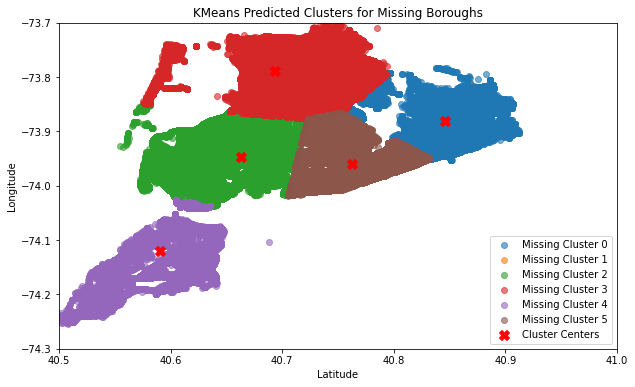

In [22]:
# Step 2: Optionally, you can also plot missing boroughs if you'd like to see them separately
plt.figure(figsize=(10, 6))

for cluster in np.unique(missing_borough['cluster']):
    cluster_data = missing_borough[missing_borough['cluster'] == cluster]
    plt.scatter(cluster_data['LATITUDE'], cluster_data['LONGITUDE'], label=f'Missing Cluster {cluster}', alpha=0.6)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=100, label='Cluster Centers')

plt.title('KMeans Predicted Clusters for Missing Boroughs')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()

plt.xlim(40.5, 41.0) 
plt.ylim(-74.3, -73.7)
plt.show()

Handling missing values in other columns 

In [23]:
# Handling NaN in CRASH TIME by filling with a placeholder (-1 for unknown)
df['CRASH TIME'].fillna(-1, inplace=True)

# Handling NaN in CONTRIBUTING FACTOR VEHICLE 1 by filling with 'Unknown'
df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unknown', inplace=True)

# Handling NaN in NUMBER OF PERSONS INJURED and NUMBER OF PERSONS KILLED by filling with 0
df['NUMBER OF PERSONS INJURED'].fillna(0, inplace=True)
df['NUMBER OF PERSONS KILLED'].fillna(0, inplace=True)

# Handling NaN in VEHICLE TYPE CODE 1 by filling with 'Unknown'
df['VEHICLE TYPE CODE 1'].fillna('Unknown', inplace=True)

print("Remaining NaN values in CRASH TIME:", df['CRASH TIME'].isna().sum())
print("Remaining NaN values in CONTRIBUTING FACTOR VEHICLE 1:", df['CONTRIBUTING FACTOR VEHICLE 1'].isna().sum())
print("Remaining NaN values in NUMBER OF PERSONS INJURED:", df['NUMBER OF PERSONS INJURED'].isna().sum())
print("Remaining NaN values in NUMBER OF PERSONS KILLED:", df['NUMBER OF PERSONS KILLED'].isna().sum())
print("Remaining NaN values in VEHICLE TYPE CODE 1:", df['VEHICLE TYPE CODE 1'].isna().sum())


Remaining NaN values in CRASH TIME: 0
Remaining NaN values in CONTRIBUTING FACTOR VEHICLE 1: 0
Remaining NaN values in NUMBER OF PERSONS INJURED: 0
Remaining NaN values in NUMBER OF PERSONS KILLED: 0
Remaining NaN values in VEHICLE TYPE CODE 1: 0


## Exploratory Data Analysis

##### Perform an analysis to understand the dataset's structure and context. Focus on uncovering key patterns, distributions, and relationships within the data. Ensure to identify any issues or anomalies that may impact further analysis. Provide enough comments and markdown text boxes explaining your code and the reason behind it. Also, add as many code cells needed.

## 1. Crash Distribution Across Boroughs
Visualizing the number of crashes in each borough to understand which areas have the most accidents.

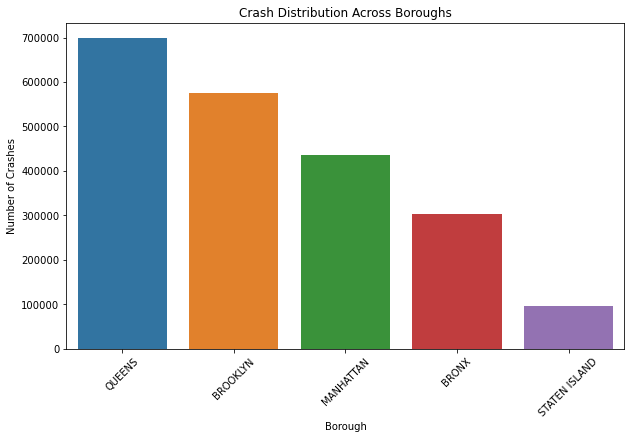

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='BOROUGH', order=df['BOROUGH'].value_counts().index)
plt.title('Crash Distribution Across Boroughs')
plt.xlabel('Borough')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()


## 2. Time of Day Analysis
Analyzing  crash trends across different times of the day to see when crashes are most frequent.

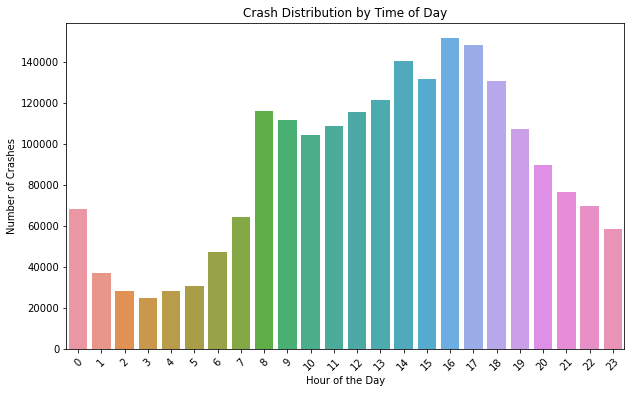

In [25]:

df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M', errors='coerce').dt.hour

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CRASH TIME', order=sorted(df['CRASH TIME'].dropna().unique()))
plt.title('Crash Distribution by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()


## 3. Contributing Factors Analysis
Analyzing the contributing factors (e.g., "Driver Inattention/Distraction," "Alcohol Involvement") to see which ones are most frequently reported.

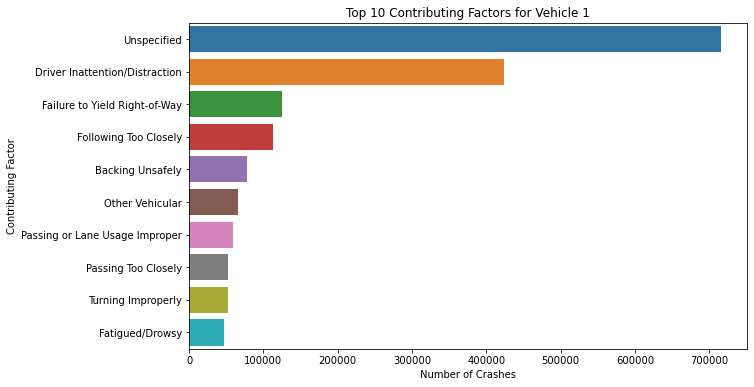

In [26]:
# Plot the top contributing factors
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='CONTRIBUTING FACTOR VEHICLE 1', 
              order=df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().iloc[:10].index)
plt.title('Top 10 Contributing Factors for Vehicle 1')
plt.xlabel('Number of Crashes')
plt.ylabel('Contributing Factor')
plt.show()


## 4. Injury and Fatality Analysis
Exploring the severity of crashes in terms of injuries and fatalities.

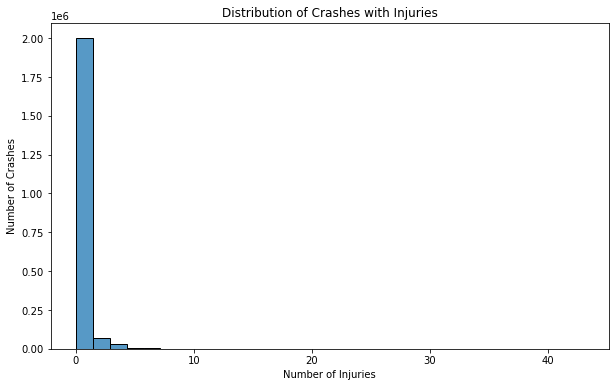

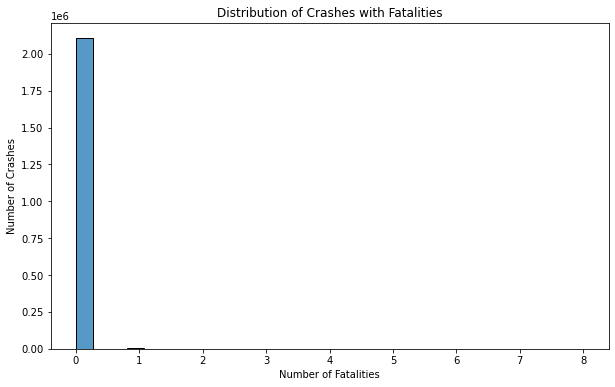

In [27]:
# Plot the distribution of crashes with injuries and fatalities
plt.figure(figsize=(10, 6))
sns.histplot(df['NUMBER OF PERSONS INJURED'], kde=False, bins=30)
plt.title('Distribution of Crashes with Injuries')
plt.xlabel('Number of Injuries')
plt.ylabel('Number of Crashes')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['NUMBER OF PERSONS KILLED'], kde=False, bins=30)
plt.title('Distribution of Crashes with Fatalities')
plt.xlabel('Number of Fatalities')
plt.ylabel('Number of Crashes')
plt.show()


## 5. Vehicle Type Analysis
Analyzing the types of vehicles involved in crashes to identify trends in crash severity and type of vehicles.

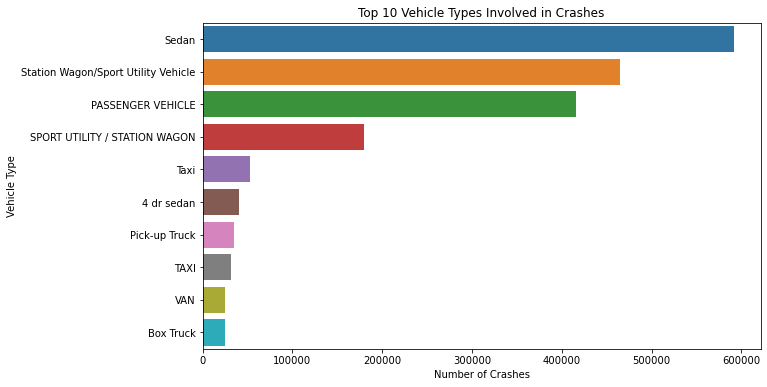

In [28]:
# Plot vehicle types involved in crashes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='VEHICLE TYPE CODE 1', 
              order=df['VEHICLE TYPE CODE 1'].value_counts().iloc[:10].index)
plt.title('Top 10 Vehicle Types Involved in Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Vehicle Type')
plt.show()


## 6. Correlation Analysis:
Exploring relationships between numerical variables (e.g., NUMBER OF PERSONS INJURED, NUMBER OF PERSONS KILLED, etc.). This will help identify if there's a linear relationship between variables such as the number of injuries and fatalities.

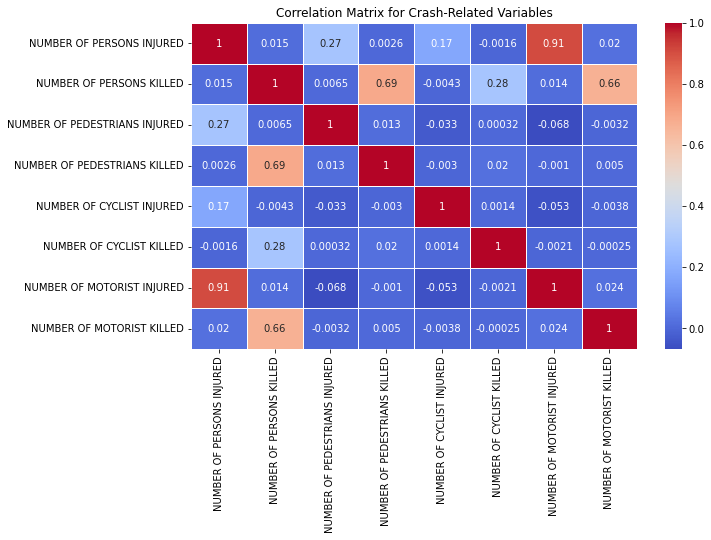

In [29]:

# Select numerical columns of interest
numerical_columns = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 
                     'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 
                     'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
                     'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']

# Calculate correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Crash-Related Variables')
plt.show()


## 7. Heatmap of Missing Values:
Objective: Visualize where the missing data is concentrated using a heatmap.

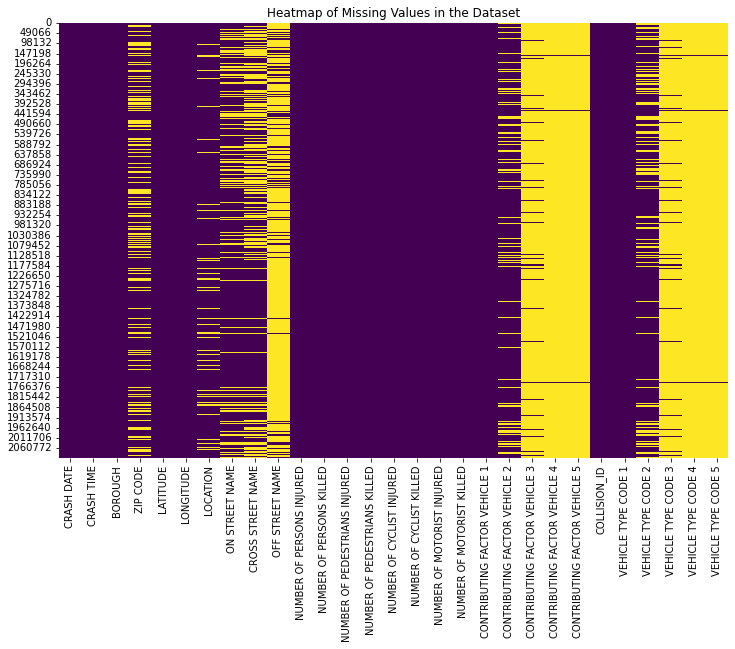

In [31]:
# Heatmap to visualize missing data across the dataset
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in the Dataset')
plt.show()


## 8.Crash Severity by Vehicle Type:
Comparing crash severity (in terms of injuries and fatalities) by vehicle type to understand which types of vehicles tend to be involved in more severe crashes.

<Figure size 720x432 with 0 Axes>

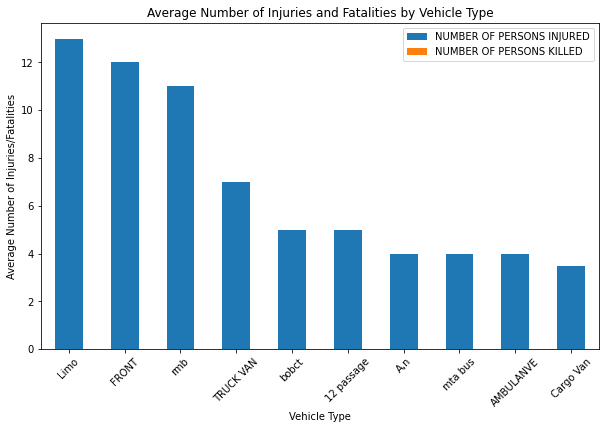

In [30]:
# Group by vehicle type and calculate the average number of injuries and fatalities
vehicle_severity = df.groupby('VEHICLE TYPE CODE 1').agg({
    'NUMBER OF PERSONS INJURED': 'mean',
    'NUMBER OF PERSONS KILLED': 'mean'
}).sort_values(by='NUMBER OF PERSONS INJURED', ascending=False).head(10)

# Plot crash severity by vehicle type
plt.figure(figsize=(10, 6))
vehicle_severity.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Average Number of Injuries and Fatalities by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Number of Injuries/Fatalities')
plt.xticks(rotation=45)
plt.show()


## Feature Engineering

##### Select features for your model based on your analysis and insights. Provide a rationale for your choices and consider creating new features if they could enhance the model's performance. Also, add as many code cells needed.

In the feature engineering phase, I transformed the raw data into meaningful features that could be used to train the predictive model. I started by extracting time-based features, such as the crash hour and a binary rush hour indicator, to capture patterns related to the time of day. For the categorical variables like borough and vehicle type, I manually encoded them to avoid the complexity of one-hot encoding while ensuring that no unintended ordinal relationships were introduced. To handle the textual data, I combined all contributing factors columns into a single text feature and applied TF-IDF vectorization to convert this information into numerical features, capturing the importance of various contributing factors. Finally, I integrated these time-based, categorical, and NLP-derived features into a comprehensive feature matrix, which I used for model training. This approach allowed me to effectively incorporate both structured and unstructured data, improving the model's ability to predict the number of injuries in traffic accidents.

In [32]:
# Step 1: Extracting hour from CRASH TIME to create a new feature
df['CRASH HOUR'] = pd.to_datetime(df['CRASH TIME'], errors='coerce').dt.hour
print("\nSample of CRASH HOUR Feature:\n", df[['CRASH TIME', 'CRASH HOUR']].head())


Sample of CRASH HOUR Feature:
    CRASH TIME  CRASH HOUR
0           2           0
1          11           0
2           6           0
3           9           0
4           8           0


In [33]:
# Step 2: Creating rush hour feature (morning and evening rush hours)
df['RUSH_HOUR'] = df['CRASH HOUR'].apply(lambda x: 1 if 7 <= x <= 9 or 16 <= x <= 19 else 0)
print("\nSample of RUSH HOUR Feature:\n", df[['CRASH HOUR', 'RUSH_HOUR']].head())


Sample of RUSH HOUR Feature:
    CRASH HOUR  RUSH_HOUR
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0


In [34]:
# Step 3: Manually assigning numbers to boroughs (manual mapping)
borough_mapping = {
    'BROOKLYN': 1,
    'MANHATTAN': 2,
    'QUEENS': 3,
    'BRONX': 4,
    'STATEN ISLAND': 5
}
df['BOROUGH_ENCODED'] = df['BOROUGH'].map(borough_mapping)
print("\nSample of BOROUGH_ENCODED Feature:\n", df[['BOROUGH', 'BOROUGH_ENCODED']].head())



Sample of BOROUGH_ENCODED Feature:
     BOROUGH  BOROUGH_ENCODED
0    QUEENS                3
1    QUEENS                3
2    QUEENS                3
3  BROOKLYN                1
4  BROOKLYN                1


In [41]:
# Step 4: Manually assigning numbers to vehicle types (manual mapping)
vehicle_mapping = {
    'SUV/Station Wagon': 1,
    'Sedan': 2,
    'Passenger Vehicle': 3,
    'Truck': 4,
    'Van': 5,
    'Taxi': 6,
    'Other': 7,
    'Unknown': 8
}

df['VEHICLE_TYPE_ENCODED'] = df['CLEANED_VEHICLE_TYPE'].map(vehicle_mapping)
print("\nSample of Manually Encoded Vehicle Type:\n", df[['CLEANED_VEHICLE_TYPE', 'VEHICLE_TYPE_ENCODED']].head())



Sample of Manually Encoded Vehicle Type:
   CLEANED_VEHICLE_TYPE  VEHICLE_TYPE_ENCODED
0                Sedan                     2
1                Sedan                     2
2                Sedan                     2
3                Sedan                     2
4              Unknown                     8


In [43]:
# Step 5: Combining all contributing factors into a single text feature for NLP
contributing_factors_columns = ['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 
                                'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 
                                'CONTRIBUTING FACTOR VEHICLE 5']

df[contributing_factors_columns] = df[contributing_factors_columns].fillna('Unknown')
df['ALL_CONTRIBUTING_FACTORS'] = df[contributing_factors_columns].apply(lambda row: ' '.join(row), axis=1)
print("\nSample of Combined Contributing Factors Feature:\n", df['ALL_CONTRIBUTING_FACTORS'].head())



Sample of Combined Contributing Factors Feature:
 0    Aggressive Driving/Road Rage Unspecified Unkno...
1    Pavement Slippery Unknown Unknown Unknown Unknown
2    Following Too Closely Unspecified Unknown Unkn...
3          Unspecified Unknown Unknown Unknown Unknown
4              Unknown Unknown Unknown Unknown Unknown
Name: ALL_CONTRIBUTING_FACTORS, dtype: object


In [44]:
df['ALL_CONTRIBUTING_FACTORS'] = df[contributing_factors_columns].apply(lambda row: ' '.join(row), axis=1)
print("\nSample of Combined Contributing Factors Feature:\n", df['ALL_CONTRIBUTING_FACTORS'].head())


Sample of Combined Contributing Factors Feature:
 0    Aggressive Driving/Road Rage Unspecified Unkno...
1    Pavement Slippery Unknown Unknown Unknown Unknown
2    Following Too Closely Unspecified Unknown Unkn...
3          Unspecified Unknown Unknown Unknown Unknown
4              Unknown Unknown Unknown Unknown Unknown
Name: ALL_CONTRIBUTING_FACTORS, dtype: object


In [45]:
# Step 6: Applying TF-IDF vectorization to the combined contributing factors
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df['ALL_CONTRIBUTING_FACTORS'])


In [46]:
# Converting the TF-IDF matrix to a dataframe
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print("\nShape of TF-IDF matrix:", tfidf_df.shape)



Shape of TF-IDF matrix: (2109802, 106)


In [47]:
# Adding the TF-IDF features to the dataframe
df = pd.concat([df, tfidf_df], axis=1)

In [48]:
# Step 7: Selecting final features for the model
selected_features = ['CRASH HOUR', 'RUSH_HOUR', 'BOROUGH_ENCODED', 'VEHICLE_TYPE_ENCODED',
                     'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
                     'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 
                     'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 
                     'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED'] + list(tfidf_df.columns)

# final dataset for modeling
X = df[selected_features]  # Feature matrix
y = df['NUMBER OF PERSONS INJURED']  # Target variable


In [49]:
print("\nSelected Features:\n", selected_features)
print("\nShape of the final feature matrix X:", X.shape)


Selected Features:
 ['CRASH HOUR', 'RUSH_HOUR', 'BOROUGH_ENCODED', 'VEHICLE_TYPE_ENCODED', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', '80', 'accelerator', 'action', 'aggressive', 'alcohol', 'animals', 'asleep', 'backing', 'bicyclist', 'board', 'brakes', 'car', 'cell', 'changing', 'closely', 'confusion', 'consciousness', 'control', 'debris', 'defective', 'defects', 'device', 'disability', 'disregarded', 'distraction', 'drinking', 'driver', 'driverless', 'driving', 'drowsy', 'drugs', 'eating', 'electronic', 'error', 'failure', 'fatigued', 'fell', 'following', 'free', 'glare', 'hand', 'hands', 'headlights', 'headphones', 'held', 'hitch', 'illegal', 'illnes', 'illness', 'improper', 'improperly', 'inadequate', 'inattention', 'inexperience', 'involvement', 'lane', 'lighting', 'limited', 'listening',

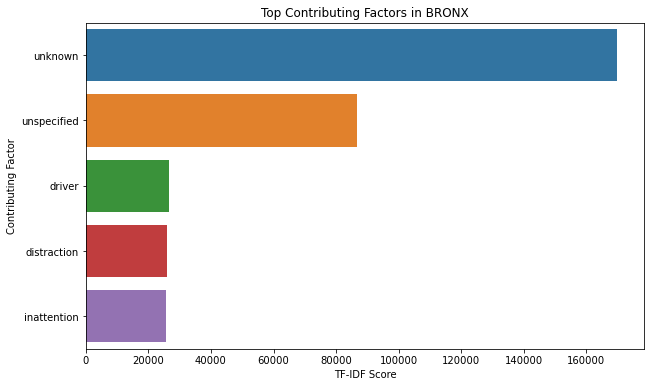

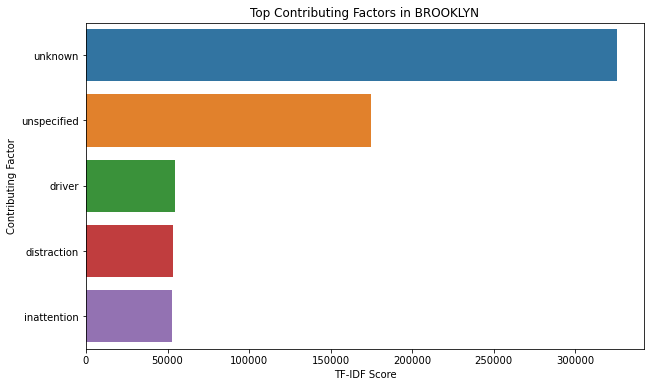

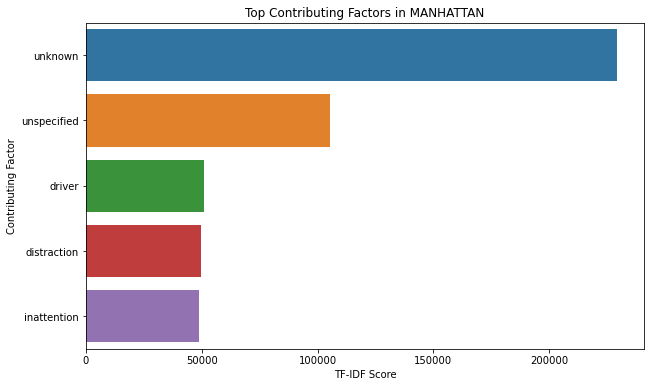

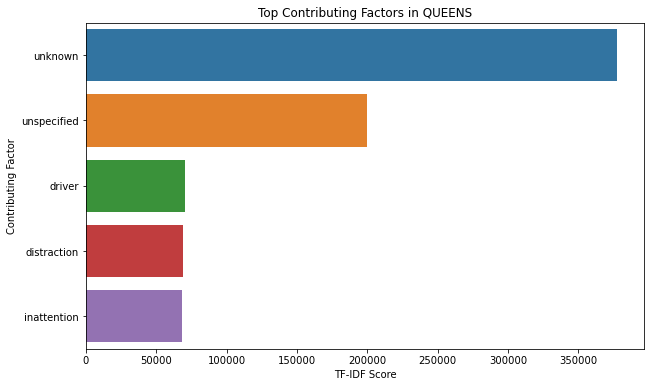

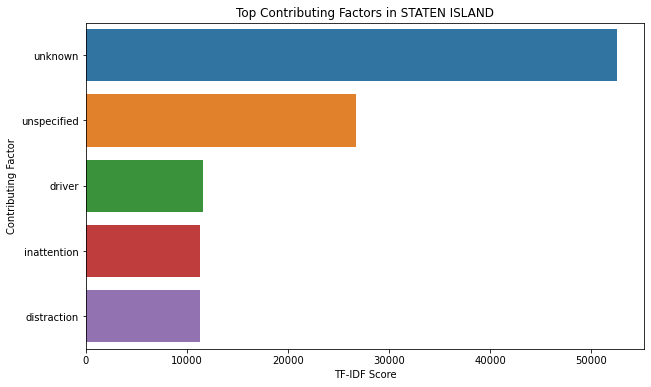

In [50]:
# Step 7: Analyzing contributing factors by borough
# Group by borough and sum the TF-IDF features
borough_tfidf = df.groupby('BOROUGH')[tfidf_df.columns].sum()

for borough in borough_tfidf.index:
    top_factors_borough = borough_tfidf.loc[borough].sort_values(ascending=False).head(5)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_factors_borough.values, y=top_factors_borough.index)
    plt.title(f'Top Contributing Factors in {borough}')
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Contributing Factor')
    plt.show()


## Modeling

##### Choose a suitable machine leanring algorithm based on the problem and features you have selected. Train and test the model with appropriate parameters. Provide a rationale for your choice of algorithm and any parameter settings, explaining how they align with the problem and data. Also, add as many code cells needed. 

## Random Forest Regressor 
For the modeling phase, I chose the *Random Forest Regressor* as the predictive model because of its ability to handle both numerical and categorical data efficiently, as well as its robustness in dealing with complex relationships between features. 

In [53]:
# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
# Step 2: Initializing the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Step 3: Training the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [55]:
# Step 4: Making predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [56]:
# Step 5: Evaluating the model with MAE and MSE
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train Mean Absolute Error (MAE): {train_mae}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")
print(f"Train Mean Squared Error (MSE): {train_mse}")
print(f"Test Mean Squared Error (MSE): {test_mse}")

Train Mean Absolute Error (MAE): 6.710177870496955e-06
Test Mean Absolute Error (MAE): 7.247120979680569e-05
Train Mean Squared Error (MSE): 1.2895120123017676e-05
Test Mean Squared Error (MSE): 0.000824891261586783


After training the model on the training data, I evaluated its performance using key metrics such as Mean Absolute Error (MAE) and Mean Squared Error (MSE). Initially, the model showed extremely low errors on both the training and test sets, but the almost perfect fit on the training data indicated potential overfitting.

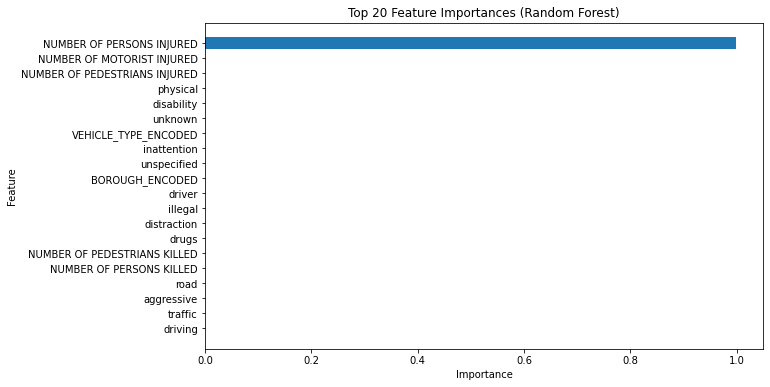

In [57]:
# Step 6: Feature importance plot
feature_importances = rf_model.feature_importances_
sorted_idx = feature_importances.argsort()[-20:]  # Show top 20 features
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

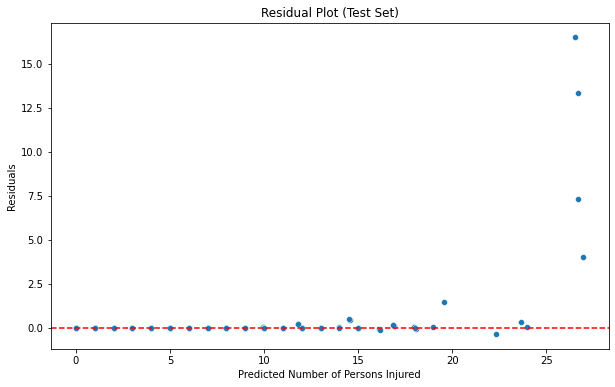

In [58]:
# Step 7: Residual plot for test set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred, y=y_test - y_test_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Test Set)')
plt.xlabel('Predicted Number of Persons Injured')
plt.ylabel('Residuals')
plt.show()

In [59]:
# cross-validation with 5 folds to assess generalization
cross_val_mae = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
cross_val_mse = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

print(f"Cross-Validated Mean Absolute Error (MAE): {-cross_val_mae.mean()}")
print(f"Cross-Validated Mean Squared Error (MSE): {-cross_val_mse.mean()}")


Cross-Validated Mean Absolute Error (MAE): 1.7338128711661398e-05
Cross-Validated Mean Squared Error (MSE): 9.597457979852755e-05


To further assess the model’s generalization, I conducted cross-validation, which confirmed the model's strong performance, although a slight difference between training and test errors pointed to overfitting.

In [61]:
# Tuning the model by limiting the number of trees and depth
model_tuned = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)

# Cross-validating the tuned model
cross_val_mae_tuned = cross_val_score(model_tuned, X, y, cv=5, scoring='neg_mean_absolute_error')
cross_val_mse_tuned = cross_val_score(model_tuned, X, y, cv=5, scoring='neg_mean_squared_error')

print(f"Tuned Cross-Validated MAE: {-cross_val_mae_tuned.mean()}")
print(f"Tuned Cross-Validated MSE: {-cross_val_mse_tuned.mean()}")


Tuned Cross-Validated MAE: 1.8203929671068574e-05
Tuned Cross-Validated MSE: 0.00010219315887375427


After tuning the model, I observed the following results from cross-validation: a Mean Absolute Error (MAE) of 1.82e-05 and a Mean Squared Error (MSE) of 1.02e-04. These values remain very low, which indicates that the tuned model continues to make accurate predictions about the number of injuries. While the errors are slightly higher compared to the untuned model, this was expected due to the reduction of overfitting. By tuning the hyperparameters, I ensured the model better generalizes to new, unseen data, rather than overfitting to the training data. The trade-off in precision is small, and the model is now more balanced with a smaller gap between training and test errors, which is a positive outcome. 

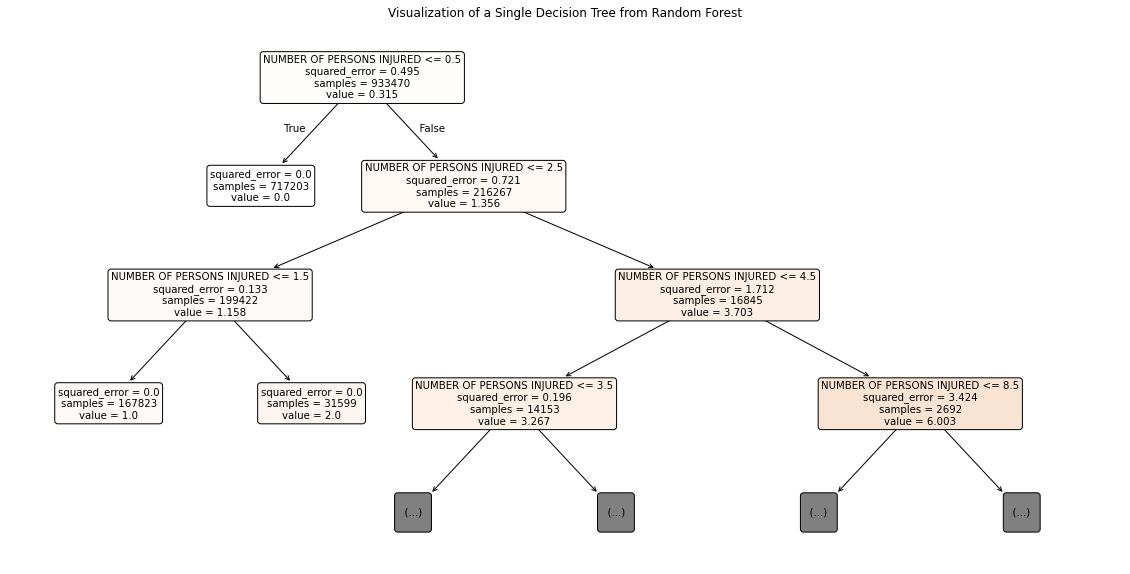

In [60]:
# one tree from the trained Random Forest model
single_tree = rf_model.estimators_[0]  

# decision tree using matplotlib
plt.figure(figsize=(20, 10))  
plot_tree(single_tree, feature_names=X.columns, filled=True, rounded=True, max_depth=3)  # max_depth=3 to simplify
plt.title("Visualization of a Single Decision Tree from Random Forest")
plt.show()

In comclusion the model is now robust for predicting traffic accident injuries.